#Support vector machine-based software reuse prediction

## Objective: To implement SVM from scratch and also compared it with using sklearn's SVM

Source of SVM: https://dzone.com/articles/classification-from-scratch-svm-78

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. SVM presents one of the most robust prediction methods, based on the statistical learning framework. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.


### 1. For all ti in training set:
 ti.w + b <= -1   if yi = -1 

 ti.w + b >= +1 if yi = +1 

or

yi(ti.w+b) >= 1

###2. for all support vectors (i.e., data points that defines margin)
  ti.w+b = -1    where ti is -ve support vector and yi is -1

  ti.w+b = +1    where ti is +ve support vector and yi is +1

###3. For decision Boundary i.e., yi(ti.w+b)=0 where ti lies within decision boundary
### 4. The goal is to maximize width (W) or to minimize |w|

W = ((X+ - X-).w)/|w|

### 5. After obtaining the tuned w and b we have

x.w+b = 1 is line passing through +ve support vectors

x.w+b = -1 is line passing through -ve support vectors

x.w+b = 0 is decision boundary

### 6. As you know it is not possible that the support vector lines always pass through support vectors

### 7. Thus, it is a convex optimization issue and will lead to a global minimum

### 8. This is Linear SVM i.e., kernel is linear

#Dataset: Reuse/predicting successful reuse

# Attribute Information:
1.  Project ID {A,B,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y}
2.  Software Staff {L,M,S}
3.  Overall Staff {L,X,M,S}
4.  Type of Software Production {product-family,isolated}
5.  Software and Product {product,alone,process,NA}
6.  SP maturity {high,middle,low}
7.  Application Domain {TLC,SE-Tools,Bank,Engine_Controller,FMS,ATC,TS,Space Manufacturing,Measurement,Finance,Book-Keeping}
8.  Type of Software {Technical,Business,Embedded-RT,Non-Embedded-RT}
9.  Size of Baseline {L,M,S,not_available}
10. Development Approach {OO,proc,not_available}
11. Staff Experience {high,middle,low,not_available}
12. Top Management Commitment {yes,no}
13. Key Reuse Roles Introduced {yes,no,NA}
14. Reuse Processes Introduced {yes,no,NA}
15. Non-Reuse Processes Modified {yes,no,NA}
16. Repository {yes,NA}
17. Human Factors {yes,no}
18. Reuse Approach {tight,loose,NA}
19. Work Products {D+C,C,R+D+C,NA}
20. Domain Analysis {yes,no,NA}
21. Origin {ex-novo,as-is,reeng,NA}
22. Independent Team {yes,no,NA}
23. When Assests Developed {before,justintime,NA}
24. Qualification {yes,no,NA}
25. Configuration Management {yes,no,NA}
26. Rewards Policy {no,yes}
27. Assests {51_to_100,21_to_50,100+,1_to_20,NA}

#Target classes 
Success or Failure {success,failure}

#Source: http://promise.site.uottawa.ca/SERepository/datasets/reuse.arff

#Tasks:
1. Initially, load arff dataset
2. Apply pre-processing techniques
3. Divide data into training and testing sets.
4. Build SVM model from scratch
5. Test your own SVM model
6. Obtain precision and recall
7. Implement sklearn's model on processed data
8. Compare your SVM model with sklearn's model

##Task 1: Implement linear SVM from scratch  
# Algorithm of Linear SVM
1.  Initialize with random big value of w say(w0,w0) we will decrease it later
2.  Set step size as w0*0.1
3.  A minimum value of b, may increase it during the process

        i.  b will range from (-b0 < b < +b0, step = step*b_multiple)

        ii. It is also computational extensive. Therefore, define b0 wisely
4.  Check for points ti in dataset:

        i.  Check all transformation of w like (w0,w0), (-w0,w0), (w0,-w0), (-w0,-w0)

        ii. if not yi(ti.w+b)>=1 for all points then break

        iii.  Else evaluate |w| and put it in dictionary as key and (w,b) as values
5.  If w<=0 then current step is completed and move to step 6

        Else minimize w as (w0-step,w0-step) and move to step 3
6.  While step not becomes w0*0.001 

        i.  step = step*0.1

        ii. move to step 3

7.  Select (w,b) that contain minimum |w| form the dictionary

##Task 2: Implement sklearn's SVM

##Task 3: Compare your SVM with sklearn's SVM with concluding remarks

#Helping links:

https://pythonprogramming.net/svm-in-python-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

http://ecomunsing.com/build-your-own-support-vector-machine




## Task 1: Implement linear SVM from scratch 

In [42]:
# Load the libraries
import pandas as pd
import numpy as np


from scipy.io import arff

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import missingno as msno
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')




In [17]:
# import sys
# !{sys.executable} -m pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\avinash\\anaconda3\\lib\\site-packages\\~klearn\\metrics\\cluster\\expected_mutual_info_fast.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\Avinash\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
# Load the arff dataset 
# Shuffel the dataset
data = arff.loadarff('data/reuse.arff')
df = pd.DataFrame(data[0])
print(df.shape)
df.head()



(24, 28)


,Project ID,Software Staff,Overall Staff,Type of Software Production,Software and Product,SP maturity,Application Domain,Type of Software,Size of Baseline,Development Approach,...,Work Products,Domain Analysis,Origin,Independent Team,When Assests Developed,Qualification,Configuration Management,Rewards Policy,# assests,Success or Failure
0,b'A',b'L',b'L',b'product-family',b'product',b'high',b'TLC',b'Technical',b'L',b'OO',...,b'D+C',b'yes',b'ex-novo',b'yes',b'before',b'yes',b'yes',b'no',b'51_to_100',b'success'
1,b'B',b'L',b'L',b'product-family',b'product',b'high',b'TLC',b'Technical',b'M',b'OO',...,b'D+C',b'yes',b'ex-novo',b'yes',b'before',b'yes',b'yes',b'no',b'51_to_100',b'success'
2,b'D',b'L',b'L',b'isolated',b'alone',b'middle',b'SE-Tools',b'Technical',b'M',b'OO',...,b'C',b'no',b'as-is',b'no',b'before',b'no',b'no',b'yes',b'21_to_50',b'failure'
3,b'E',b'L',b'L',b'isolated',b'alone',b'middle',b'TLC',b'Technical',b'M',b'OO',...,b'C',b'no',b'as-is',b'no',b'before',b'no',b'no',b'yes',b'21_to_50',b'failure'
4,b'F',b'L',b'L',b'isolated',b'alone',b'middle',b'TLC',b'Technical',b'M',b'OO',...,b'C',b'no',b'as-is',b'no',b'before',b'no',b'no',b'yes',b'21_to_50',b'failure'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 28 columns):
Project ID                      24 non-null object
Software Staff                  24 non-null object
Overall Staff                   24 non-null object
Type of Software Production     24 non-null object
Software and Product            24 non-null object
SP maturity                     24 non-null object
Application Domain              24 non-null object
Type of Software                24 non-null object
Size of Baseline                24 non-null object
Development Approach            24 non-null object
Staff Experience                24 non-null object
Top Management Commitment       24 non-null object
Key Reuse Roles Introduced      24 non-null object
Reuse Processes Introduced      24 non-null object
Non-Reuse Processes Modified    24 non-null object
Repository                      24 non-null object
Human Factors                   24 non-null object
Reuse Approach                

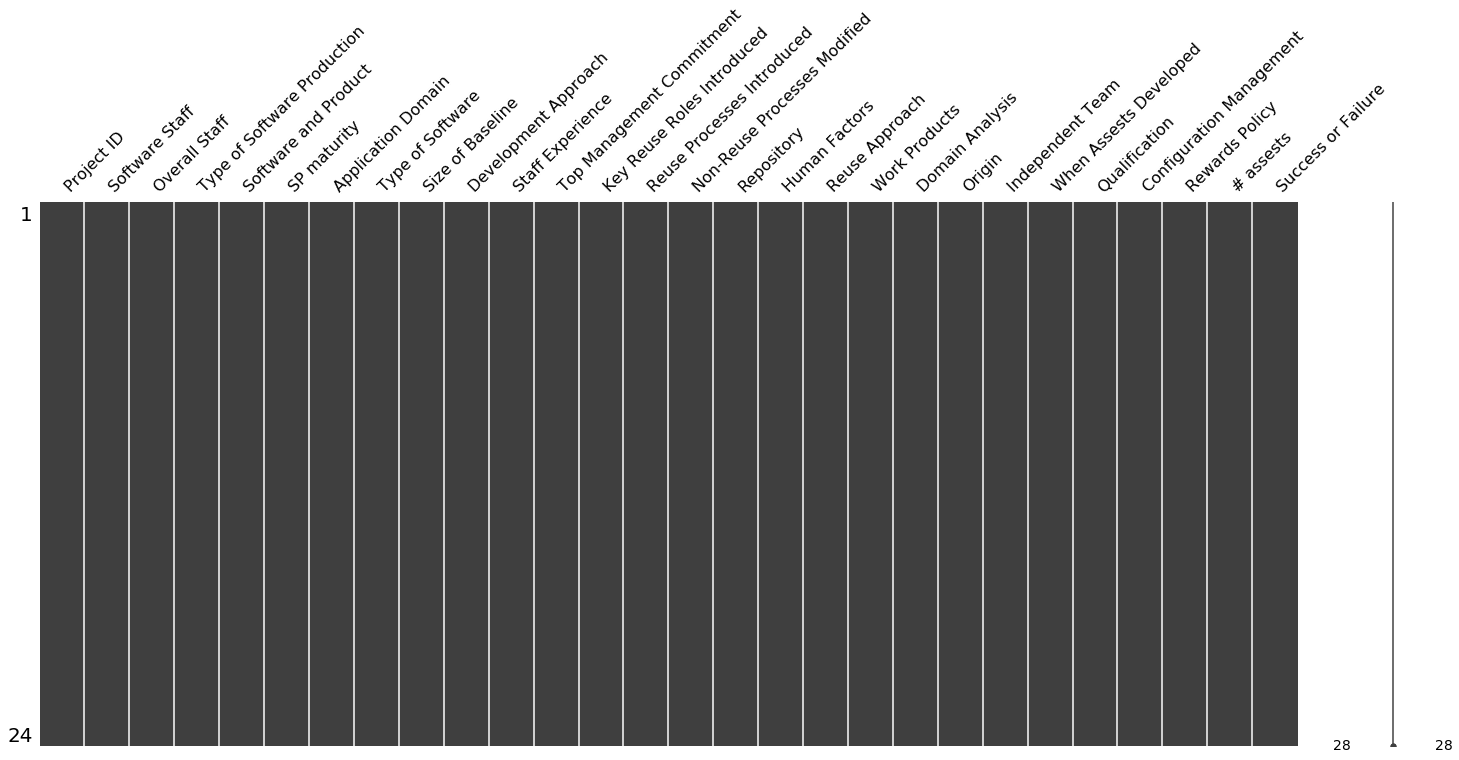

In [20]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
print(df.info())
msno.matrix(df)



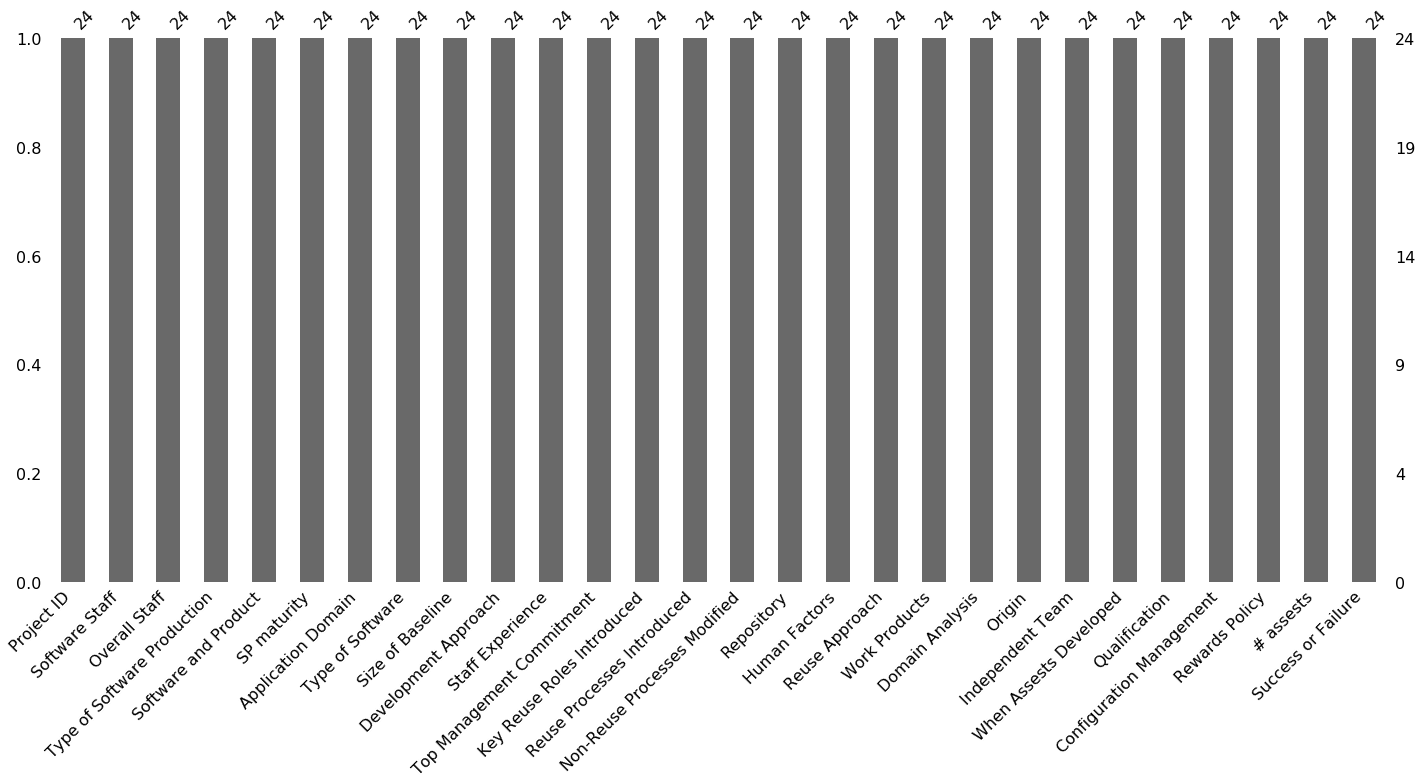

In [21]:
msno.bar(df)

In [24]:
columns= df.columns
columns

Index(['Project ID', 'Software Staff', 'Overall Staff',
       'Type of Software Production', 'Software and Product', 'SP maturity',
       'Application Domain', 'Type of Software', 'Size of Baseline',
       'Development Approach', 'Staff Experience', 'Top Management Commitment',
       'Key Reuse Roles Introduced', 'Reuse Processes Introduced',
       'Non-Reuse Processes Modified', 'Repository', 'Human Factors',
       'Reuse Approach', 'Work Products', 'Domain Analysis', 'Origin',
       'Independent Team', 'When Assests Developed', 'Qualification',
       'Configuration Management', 'Rewards Policy', '# assests',
       'Success or Failure'],
      dtype='object')

In [30]:
labelencoder = LabelEncoder()
for i in columns:
    df[i] = labelencoder.fit_transform(df[i])
df.head(10)

,Project ID,Software Staff,Overall Staff,Type of Software Production,Software and Product,SP maturity,Application Domain,Type of Software,Size of Baseline,Development Approach,...,Work Products,Domain Analysis,Origin,Independent Team,When Assests Developed,Qualification,Configuration Management,Rewards Policy,# assests,Success or Failure
0,0,0,0,1,3,0,10,3,0,0,...,1,2,2,2,1,2,2,0,3,1
1,1,0,0,1,3,0,10,3,1,0,...,1,2,2,2,1,2,2,0,3,1
2,2,0,0,0,1,2,8,3,1,0,...,0,1,1,1,1,1,1,1,2,0
3,3,0,0,0,1,2,10,3,1,0,...,0,1,1,1,1,1,1,1,2,0
4,4,0,0,0,1,2,10,3,1,0,...,0,1,1,1,1,1,1,1,2,0
5,5,0,3,1,2,1,1,0,0,0,...,0,1,3,1,2,2,2,0,3,1
6,6,1,1,1,3,0,3,1,0,0,...,3,1,3,1,2,1,2,0,3,1
7,7,1,3,1,3,2,4,3,1,0,...,1,1,3,1,2,1,1,0,3,0
8,8,1,3,1,3,2,4,3,1,0,...,1,1,3,1,2,1,1,0,3,0
9,9,1,3,1,3,2,0,2,0,2,...,3,2,3,1,2,2,2,0,0,1


In [35]:
df.describe()

,Project ID,Software Staff,Overall Staff,Type of Software Production,Software and Product,SP maturity,Application Domain,Type of Software,Size of Baseline,Development Approach,...,Work Products,Domain Analysis,Origin,Independent Team,When Assests Developed,Qualification,Configuration Management,Rewards Policy,# assests,Success or Failure
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11.500000,1.125000,1.625000,0.833333,2.458333,1.291667,6.583333,1.916667,0.833333,0.708333,...,1.375000,1.333333,2.375000,1.041667,1.625000,1.541667,1.625000,0.125000,1.625000,0.625000
std,7.071068,0.797414,1.312565,0.380693,0.931533,0.858673,3.295803,1.212854,0.761387,0.954585,...,1.377222,0.564660,0.923721,0.358641,0.575779,0.588230,0.575779,0.337832,1.345282,0.494535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.750000,0.000000,1.000000,2.000000,0.750000,4.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,11.500000,1.000000,1.500000,1.000000,3.000000,2.000000,6.500000,2.500000,1.000000,0.000000,...,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.500000,1.000000
75%,17.250000,2.000000,3.000000,1.000000,3.000000,2.000000,10.000000,3.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,0.000000,3.000000,1.000000
max,23.000000,2.000000,3.000000,1.000000,3.000000,2.000000,11.000000,3.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000


In [36]:
# Divide the dataset to training and testing set
X=df.drop('Success or Failure',axis=1)
y=df['Success or Failure']



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 27)
(8, 27)
(16,)
(8,)


In [43]:
# Implement SVM from scratch 
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
            
    def fit(self, data):
        self.data=data
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]
        
        # extremely expensive
        b_range_multiple = 5
        # 
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
            for i in self.data:
                for xi in self.data[i]:
                    yi=i
                    print(xi,':',yi*(np.dot(self.w,xi)+self.b))            


    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*', c=self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')

        return classification




In [44]:
# Train and test your SVM models
def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()



TypeError: 'int' object is not iterable

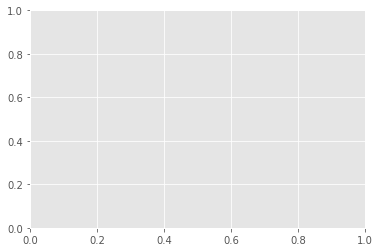

In [45]:
# Evaluate training and testing precision and recall
svm = Support_Vector_Machine()
svm.fit(data=X)
predict_us = y
for p in predict_us:
    svm.predict(p)

svm.visualize()




##Task 2: Implement sklearn's SVM


In [ ]:
# Use the preprocessed dataset here



In [ ]:
# Divide the dataset to training and testing set

In [ ]:
# Train SVM model using sklearn's SVM





In [ ]:
# Evaluate training and testing precision and recall

In [ ]:
# Play with the intial/hyper parameters of the models(Optional)




##Task 3: Compare your SVM with sklearn's SVM with concluding remarks
